In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
data['GrLivArea'].head(2)

0    1710
1    1262
Name: GrLivArea, dtype: int64

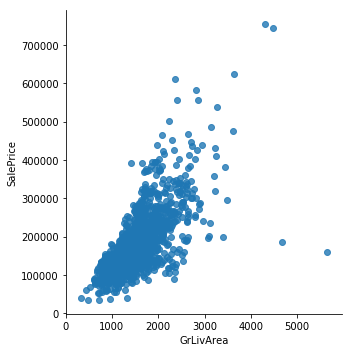

In [9]:
sns.lmplot('GrLivArea', 'SalePrice', data=data,fit_reg=False )
plt.show()

In [10]:
data['Normalized_Area'] = (data['GrLivArea'] - data['GrLivArea'].mean())/data['GrLivArea'].std()

#Grab the relevant data, scale the predictor variable for the gradient descent...
x = data['Normalized_Area']
y = data['SalePrice']

In [83]:
#GRADIENT DESCENT

alpha = 0.001 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2,1) #Pick some random values to start with
print(theta)

[[ 0.69646919]
 [ 0.28613933]]


In [88]:
#GRADIENT DESCENT
theta = np.random.rand(2,1)

def gradient_descent(x, y, theta, iterations, alpha):
    x_new = np.concatenate((np.ones([x.size,1]),np.array(x).reshape(x.size,1)),axis=1)
    y_new = np.array(y).reshape(y.size,1)
    
    for i in range(iterations):
        h = np.dot(x_new,theta)
        cost = 1 / (2 * x.size) * np.sum((h - y_new) ** 2)
        theta -= alpha / (1 * x.size) * np.dot(np.transpose(x_new) , (h - y_new))
    
        """
    TODO: Implement the algorithm
    Pseudocode
    for i to iterations
        compute current cost value
        compute gradients
        update theta => thetha = thetha - alpha * gradient
    return theta and cost
    """
        
    return theta, cost

#Pass the relevant variables to the function and get the new values back...
theta, cost = gradient_descent(x, y, theta, iterations, alpha)

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0][0], theta[1][0]))

Gradient Descent: 156460.76, 48673.45


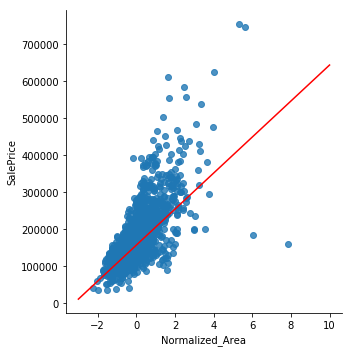

In [90]:
#Plot the regression line obtained from our algorithm
x_line = np.linspace(-3, 10, 100)
y_line = theta[0] + theta[1] * x_line
sns.lmplot('Normalized_Area', 'SalePrice', data=data, fit_reg=False)
plt.plot(x_line, y_line, 'r')
plt.show()